# <center>MỘT VÀI ĐỊNH NGHĨA</center>
**PMF** = probability mass function, dành cho discrete distributions  
**PDF** = probability density function, dành cho continuous distributions  
=> Hai định nghĩa trên được hiểu là xác suất xảy ra event với các params như p,n,.. tại giá trị x.  

**CDF** = cumulative density function, là tổng xác suất từ giá trị đầu tiên đến giá trị x  
**SF** = survival function, là tổng xác suất từ giá trị x đến giá trị cuối cùng, = 1-CDF  
=> Đối với discrete distributions thì 2 functions này tổng các PMF.  
=> Đối với continuous distributions thì 2 functions này là tích phân PDF

*Ngược lại,*  
**PPF** = percent point function, nhập CDF cho giá trị x  
**ISF** = inverse survival function, nhập SF cho giá trị x

---
# Indicator function

$$ I_{\{A\}}(x) = 
  \begin{cases}
    1  &  \text{if } A \text{ is True}\\
    0  &  \text{if } A \text{ is False}
  \end{cases}
$$

Có thể viết tắt là $ I_{\{A\}} $  ~ bỏ (X).  
Ví dụ: với x=3 thì:
- $ I_{\{2<x<10\}} = 1$
- $ I_{\{x<0\}} = 0$

# Expected Value
Là tổng của tất cả giá trị thực nhân trọng số. Đối với biến liên tục thì dùng tích phân.
- Discrete: $E[X]=\displaystyle\sum_{x} xP(X =x)=\displaystyle\sum_{x} xf(x)$
- Continuous: $E[X]=\int_{-\infty}^\infty xf(x)dx$  

Expected value có thể xem như là số trung bình.  
##### Một số đặc tính của Expected Value:
- $ E[aX+bY+c] = aE[X] + bE[Y] +c $
- $ E[g(X)] = \int_{-\infty}^\infty g(x)f(x)dx$  
- $ g(E[X]) \neq E[g(X)] $

# Variance
Phương sai: Dùng để định lượng sự biến thiên của một biến.
$$ \text{Var}[X] = E[(X-\mu)^2]$$

- Discrete: $ \text{Var}[X] = \displaystyle\sum_x \Big( (x-\mu)^2f(x) \Big)$
- Continuous: $ \text{Var}[X] = \int_{-\infty}^{\infty} (x-\mu)^2f(x)dx$

Công thức rút gọn: $ \text{Var}[X] = E[X^2] - E[X]^2 $  
Căn bậc hai của Variance là Standard deviation (độ lệch chuẩn).  
##### Một số đặc tính của Variance:
- $ \text{Var}[aX+bY+c] = a^2\text{Var}[X] + b^2\text{Var}[Y] $


---
# Thực hành với E[X], Var[X]
Một biến số có phân phối theo hàm PDF = $f(x) = 3x^2. I_{\{0\leq x\leq 1\}}(x)$

Expected Value:  
$ E[X] = \int_{-\infty}^\infty xf(x)dx = \int_0^1 x.3x^2dx = \left.\frac{3x^4}{4}\right|_0^1=\frac{3}{4}$

Expected Value với g(x) = x$^2$:  
$ E[X^2] = \int_{-\infty}^\infty x^2f(x)dx = \int_0^1 x^2.3x^2dx = \left.\frac{3x^5}{5}\right|_0^1=\frac{3}{5}$  

Variance:  
$ \text{Var}[X] = E[X^2] - E[X]^2 = \frac{3}{5} - (\frac{3}{4})^2 = \frac{3}{80} $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

---
# <center>DISCRETE DISTRIBUTIONS</center>

---
# [BERNOULLI DISTRIBUTION](https://en.wikipedia.org/wiki/Bernoulli_distribution)
Là phân phối của tỉ lệ ra event  
$$ X \sim B(p) $$
$$ \text{PMF} = pI_{\{x=1\}} $$   

$$ E[X] = p \quad \text{Var}[X]= p(1-p)$$

In [2]:
# 1 đồng xu có p(head)=0.4
p = 0.4
bernoulli = st.bernoulli(p)

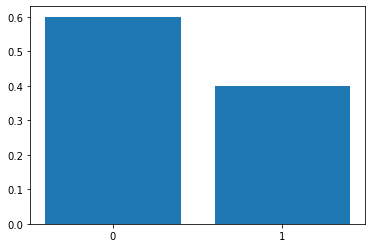

In [3]:
# vẽ pmf
a = [0,1]
plt.bar(a, bernoulli.pmf(a))
plt.xticks(a);

---
# [BINOMIAL DISTRIBUTION](https://en.wikipedia.org/wiki/Binomial_distribution)
Là phân phối tổng của nhiều lần bernoulli.  
$$ X \sim Binom(n, p) $$
$$ \text{PMF} = C^n_xp^x(1-p)^{n-x} $$
$$ C^n_x = Combination = \frac{n!}{x!(n-x)!} $$
$$ E[X] = np \quad \text{Var}[X] = np(1-p) $$

In [4]:
# Tung 1 đồng xu có p(head)=0.4 và tung 100 lần
n, p = 100, 0.4
binom = st.binom(n,p)

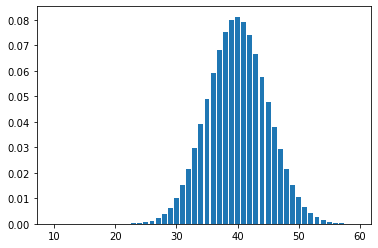

In [5]:
# vẽ pmf từ 10 đến 60
a = np.arange(10,60)
plt.bar(a, binom.pmf(a));

In [6]:
# xác suất để tung 20 lần ra head khi tung 100 lần
binom.pmf(20)

1.0530552862387031e-05

In [7]:
# xác suất để tung 40 lần ra head khi tung 100 lần
binom.pmf(40)

0.08121914499609979

In [8]:
# xác suất để tung 35 đến 45 lần ra head khi tung 100 lần
np.sum(binom.pmf(np.arange(35,46)))

0.7385730184692305

In [9]:
binom.mean()

40.0

---
# [GEOMETRIC DISTRIBUTION](https://en.wikipedia.org/wiki/Geometric_distribution)
Là phân phối xác suất của số lần để đạt được event đầu tiên.  
Ví dụ:  
- Số lần để ra mặt head đầu tiên của một đồng xu
- Số lần test để có donor đầu tiên tương hợp ghép tạng 

$$ X \sim \text{Geo}(p) $$
$$ \text{PMF} = p(1-p)^{x-1} \quad\text{for x=1, 2,..} $$
$$ E[X] = 1/p \quad \text{Var}[X] = \frac{1-p}{p^2}$$

In [10]:
# 1 đồng xu fake có p(head) = 0.3
p=0.3
geom = st.geom(p)

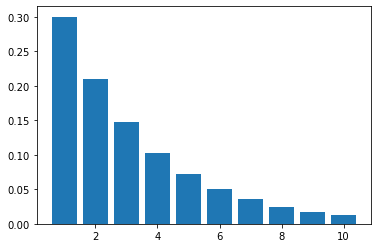

In [11]:
# vẽ pmf
a = np.array(range(1,11))
plt.bar(a, geom.pmf(a));

**=> Như vậy, xác suất để lần 1 ra head là 0.3, lần 2 ra head là 0.7\*0.3=0.21, lần 3 là 0.7\*0.7\*0.3=0.15, từ từ giảm xuống**

In [12]:
# xác xuất để 3 lần đầu ra head
# dùng CDF(3) = PMF(1) + PMF(2) + PMF(3)
geom.cdf(3)

0.6569999999999999

In [13]:
# dùng tổng PMF
a = np.array([1,2,3])
np.sum(geom.pmf(a))

0.657

---
# [MULTINOMIAL DISTRIBUTION](https://en.wikipedia.org/wiki/Multinomial_distribution)
là phân phối tổng quát hóa của binomial distribution.  
- n là tổng số lần
- k là số nhóm
- $x_i$ là số lần của nhóm i => $\sum_{i=1}^kx_i=n $
- $p_i$ là xác suất nhóm i => $\sum_{i=1}^kp_i=1 $
$$ X_1, X_2,\dots, X_k \sim Multinomial(n, k, p_1, \dots, p_k) $$
$$ \text{PMF} = \frac{n!}{x_1!\dots x_2!}p_1^{x_1}p_2^{x_2}\dots p_k^{x_k}$$
$$ E[X_i] = np_i \quad \text{Var}[X_i] = np_i(1-p_i) $$

In [14]:
# 1 cục xí ngầu có p1=..=p5=0.15; p6 =0.25
# tung 100 lần
n = 100
p1 = p2 = p3 = p4 = p5 = 0.15
p6 = 0.25
multi = st.multinomial(n, [p1,p2,p3,p4,p5,p6])

In [15]:
# xác xuất để ra k1=k2=k3=k4=k5=10, k6=50
multi.pmf([10,10,10,10,10,50])

2.4528839654987966e-11

In [16]:
# xác xuất để ra k1=k2=k3=k4=k5=14, k6=30
multi.pmf([14,14,14,14,14,30])

1.284961789878166e-05

In [17]:
# xác xuất để ra k1=k2=k3=k4=k5=15, k6=25
multi.pmf([15]*5 + [25])

2.25011423021118e-05

---
# [POISSON DISTRIBUTION](https://en.wikipedia.org/wiki/Poisson_distribution)
Là phân phối xác suất xảy ra event khi biết khoảng thời gian/không gian giữa 2 events xảy ra là hằng định.  
Dùng để biểu diễn số lần xảy ra trong một khoảng thời gian
$$ X \sim \text{Poisson}(\lambda) $$
$$ \text{PMF} = \frac{\lambda^xe^{-\lambda}}{x!} $$
$$ E[X] = \text{Var}[X] = \lambda $$

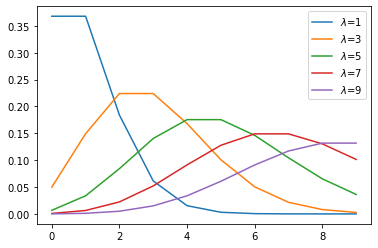

In [18]:
a = np.arange(0,10)
for i in np.array([1,3,5,7,9]):
    plt.plot(a, st.poisson(i).pmf(a), label=f"$\lambda$={i}");
plt.legend();

In [19]:
# Xuất huyết não 2 ca / tuần
poisson = st.poisson(2)

In [20]:
# Xác suất xảy ra nhiều hơn 2 ca Xuất huyết não tuần sau
# = 1 - xác suất ( 0 ca + 1 ca + 2 ca)
1 - poisson.cdf(2)

0.3233235838169366

---
# <center>CONTINUOUS DISTRIBUTIONS</center>

---
# [EXPONENTIAL DISTRIBUTION](https://en.wikipedia.org/wiki/Exponential_distribution)
Là phân phối xác suất thời gian giữa 2 event khi biết thời gian trung bình giữa 2 event là hằng định.  
Dùng để biểu diễn thời gian chờ đợi  
Khá giống geometric distribution
$$ X \sim \text{Exp}(\lambda) $$
$$ \text{PDF} = \lambda e^{-\lambda x}I_{\{x \geq0\}}$$
$$ E[X]=1/\lambda \quad \text{Var}[X]=1/\lambda^2 $$

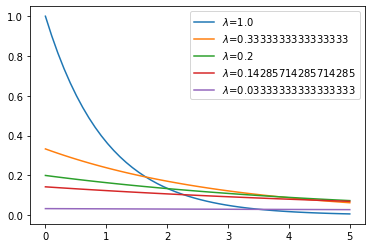

In [21]:
a = np.linspace(0,5,50)
for i in np.array([1,3,5,7,30]):
    plt.plot(a, st.expon(scale=i).pdf(a), label=f"$\\lambda$={1/i}");
plt.legend();

In [22]:
# Mỗi lần đợi bạn gái thì tốn khoảng 30 phút để bạn gái xuất hiện
# Hay 1/30 bạn gái trong 1 phút
# lambda là 1/E[X] = 1/30, scale là độ lệch chuẩn bằng sqrt(var) = sqrt(1/lambda^2) = 1/lambda = 30
expon = st.expon(scale=30);

In [23]:
# xác suất để bạn gái xuống trong vòng 5 phút
# PDF(0 < X < 5) 
expon.cdf(5)

0.15351827510938593

In [24]:
# xác suất để bạn gái xuống trong vòng 15 phút
expon.cdf(15)

0.3934693402873666

In [25]:
# xác suất để bạn gái xuống trong vòng 30 phút
expon.cdf(30)

0.6321205588285577

In [26]:
# xác suất để bạn gái xuống > 30 phút
1 - expon.cdf(30)

0.36787944117144233

In [27]:
# SF = 1 - CDF
expon.sf(30)

0.36787944117144233

---
# [GAMMA DISTRIBUTION](https://en.wikipedia.org/wiki/Gamma_distribution)
Khi $X_1, X_2,\dots, X_n$ là thời gian để xảy ra event độc lập với nhau tuân theo cùng một phân phối Exp($\lambda$),  
thì tổng thời gian $X = \sum_1^n X_n$ tuân theo phân phối Gamma với $\alpha =n$ và $\beta=\lambda$

$$ X \sim \text{Gamma}(\alpha, \beta)$$
$$ \text{PDF} = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} I_{\{x\geq 0\}} \quad \text{with} \; \Gamma(\alpha) = (\alpha-1)! $$
$$ E[X] = \alpha/\beta \quad \text{Var}[X] = \alpha/\beta^2 $$

Khi $\alpha$ tăng, pp gamma có hình dạng giống pp normal.

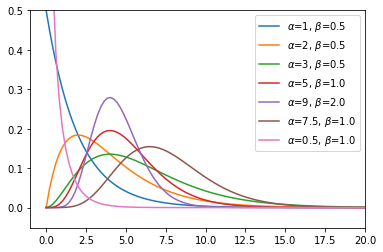

In [28]:
# plot giống trang wiki, 
arr = np.linspace(0,20,100)
params = zip([1,2,3,5,9,7.5,0.5], 1/np.array([2,2,2,1,0.5,1,1,1]))
for a, b in params:
    plt.plot(arr, st.gamma(a=a, scale=1/b).pdf(arr), label=r"$\alpha$={}, $\beta$={}".format(a,b))
plt.xlim(right=20)
plt.ylim(top=0.5)
plt.legend();

---
# [UNIFORM DISTRIBUTION](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))
Là phân phối mà mọi giá trị trong nó đều có xác suất như nhau.  

$$ X \sim \text{Uniform}(a, b)$$
$$ \text{PDF} = \frac{1}{b-a}I_{\{a\leq x\leq b\}} $$
$$ E[X] = \frac{a+b}{2} \quad \text{Var}[X]=\frac{(b-a)^2}{12}$$

Standard Uniform distribution = Uniform(0, 1)

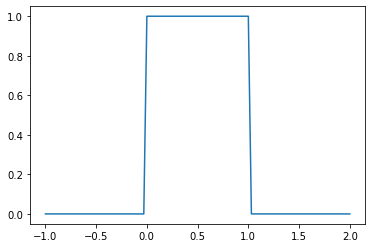

In [29]:
a, b = 0, 1
arr = np.linspace(-1,2,100)
plt.plot(arr, st.uniform().pdf(arr))

---
# [BETA DISTRIBUTION](https://en.wikipedia.org/wiki/Beta_distribution)
Là phân phối random dựa trên X từ (0, 1) với 2 thông số alpha, beta.  
Thường được dùng để mô tả xác suất p của biến nhị phân, với  
- $\alpha=k, \; \beta=n-k$  
Ví dụ:  
Với đồng xu có p(head) = 0.5 thì beta(0.5, 0.5) có p(head) = p(tail)( p(0)=p(1) ) ( xem đồ thị ). 
$$ X \sim \text{Beta}(\alpha, \beta) \quad \text{with}\: \alpha>0, \beta>0$$
$$ \text{PDF} = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}I_{\{0< x< 1\}}$$
$$ E[X] = \frac{\alpha}{\alpha+\beta} \quad \text{Var}[X] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $$


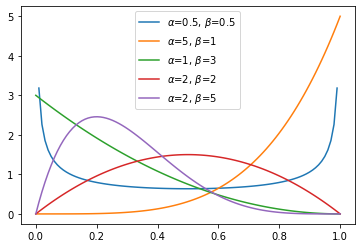

In [30]:
arr = np.linspace(0,1,100)
params = zip( [0.5, 5,1,2,2], [0.5,1,3,2,5])
for a,b in params:
    plt.plot(arr, st.beta(a=a, b=b).pdf(arr), label=r"$\alpha$={}, $\beta$={}".format(a,b))
plt.legend();

---
# [NORMAL DISTRIBUTION](https://en.wikipedia.org/wiki/Normal_distribution)
Là phân phối thông dụng và quan trọng nhất.  
Để biểu diễn phân phối của tổng hoặc trung bình của dãy số ngẫu nhiên.  
$$ X \sim N(\mu, \sigma^2) $$
$$ \text{PDF} = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$

Standard normal distribution: $ N(0,1)$. 

Một số tính chất:   
$ X_1 \sim N(\mu_1, \sigma^2_1) \;\text{and} \; X_2 \sim N(\mu_2, \sigma^2_2)$  
$ => X_1 + X_2 \sim N(\mu_1 +\mu_2, \sigma^2_1+\sigma^2_2)$  

Lấy n mẫu từ cùng 1 normal distribution, thì trung bình của các mẫu ấy đã theo phân phối $ \overline{X}
\sim N(\mu, \frac{\sigma^2}{n})$ 

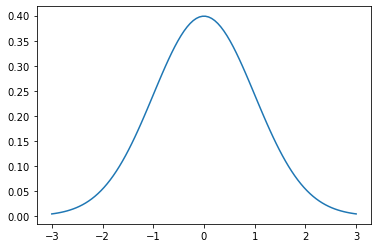

In [31]:
arr = np.linspace(-3,3,100)
plt.plot(arr, st.norm().pdf(arr));

---
# [T DISTRIBUTION](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
Là phân phối normal nhưng mẫu quá nhỏ và không biết phương sai của quần thể.  
Khi mẫu đủ lớn (>30) thì phân phối giống như normal   

$$ X \sim t(\nu) $$
$$ \text{PDF} = \frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right) \sqrt{\nu\pi}}  \left( 1 + \frac{y^2}{\nu} \right) ^ {-( \frac{\nu+1}{2} )} $$
$$ E[X]=0 \quad \text{Var}[X] = \frac{\nu}{\nu-2} $$

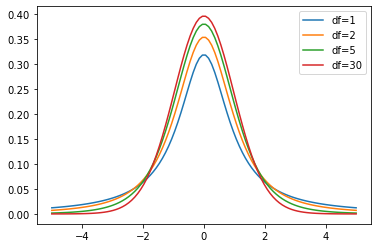

In [32]:
arr = np.linspace(-5,5,100)
for i in [1,2,5,30]:
    plt.plot(arr, st.t(df=i).pdf(arr), label=f"df={i}")
plt.legend();